In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

In [47]:
def compute_cost_binary(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    return np.squeeze(cost)

def compute_cost_multiclass(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL)) / m
    return np.squeeze(cost)

In [48]:
def forward_propagation(X, parameters, layers, activation='sigmoid'):
    caches = []
    A = X
    for l in range(1, len(layers)):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        if l == len(layers) - 1:
            A = softmax(Z) if activation == 'softmax' else sigmoid(Z)
        else:
            A = relu(Z)
        caches.append((A, Z))
    return A, caches

In [49]:
def backward_propagation(X, Y, parameters, caches, layers, activation='sigmoid'):
    grads = {}
    m = X.shape[1]
    L = len(layers) - 1
    AL, _ = caches[-1]
    dA = AL - Y

    for l in reversed(range(1, L + 1)):
        A_prev = X if l == 1 else caches[l - 2][0]
        Z = caches[l - 1][1]
        dZ = dA * (AL * (1 - AL) if l == L and activation == 'softmax' else relu_derivative(Z))
        grads['dW' + str(l)] = np.dot(dZ, A_prev.T) / m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m
        dA = np.dot(parameters['W' + str(l)].T, dZ)

    return grads

In [58]:
def initialize_parameters(layers):
    parameters = {}
    for l in range(1, len(layers)):
        parameters['W' + str(l)] = np.random.randn(layers[l], layers[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layers[l], 1))
    return parameters


In [51]:
def update_parameters(parameters, grads, learning_rate):
    for l in range(1, len(parameters) // 2 + 1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]
    return parameters

In [69]:
def neural_network(X, Y, layers, iterations, learning_rate, activation='sigmoid', cost_print_interval=10):
    np.random.seed(1)
    parameters = initialize_parameters(layers)
    j=[]
    for i in range(iterations):
        AL, caches = forward_propagation(X, parameters, layers, activation)

        cost = compute_cost_binary(AL, Y) if activation == 'sigmoid' else compute_cost_multiclass(AL, Y)

        grads = backward_propagation(X, Y, parameters, caches, layers, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        j.append(cost)
        if i % cost_print_interval == 0:
            print(f"Iteration {i} - Cost: {cost}")
    plt.plot(range(ittr), j)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost (j)')
    plt.title('Cost vs. Iterations')
    plt.show()
    return parameters

In [53]:
def one_hot_encode(Y):
    num_classes = np.max(Y) + 1
    return np.eye(num_classes)[Y.reshape(-1)].T

In [54]:
def predict(X, parameters, layers, activation='sigmoid'):

    AL, _ = forward_propagation(X, parameters, layers, activation)

    if activation == 'sigmoid':
        predictions = (AL > 0.5).astype(int).flatten()
    elif activation == 'softmax':
        predictions = np.argmax(AL, axis=0)
    else:
        raise ValueError("Unsupported activation function. Use 'sigmoid' or 'softmax'.")

    return predictions


In [55]:
data = np.array(pd.read_csv("nn_train.csv"))
m, n = data.shape
X_train = data[:, 1:n-2].T
Y_trainB = data[:, n-2].reshape(1, -1)
Y_trainM = one_hot_encode(data[:, n-1])

In [56]:
def scaling(X):
    return (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)
X_train = scaling(X_train)

Iteration 0 - Cost: 0.6931471803415544
Iteration 10 - Cost: 0.6931471803415115
Iteration 20 - Cost: 0.6931471803415113
Iteration 30 - Cost: 0.6931471803415112
Iteration 40 - Cost: 0.6931471803415115
Iteration 50 - Cost: 0.6931471803415113
Iteration 60 - Cost: 0.6931471803415113
Iteration 70 - Cost: 0.6931471803415113
Iteration 80 - Cost: 0.6931471803415113
Iteration 90 - Cost: 0.6931471803415112


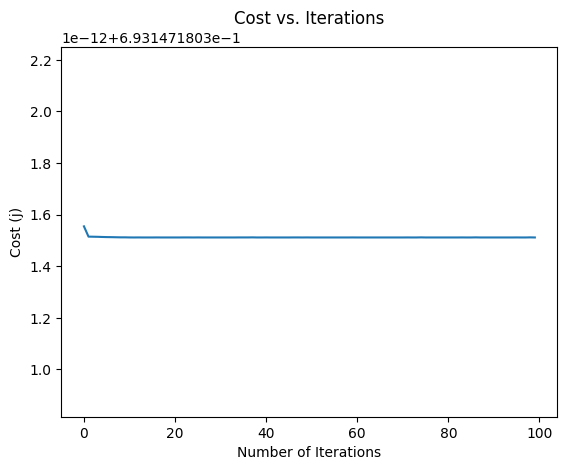

Binary Classification Accuracy: 50.00%


In [70]:
layers_binary = [X_train.shape[0], 5, 6, 4, 1]
parameters_binary = neural_network(X_train, Y_trainB, layers_binary, iterations=100, learning_rate=0.0001, activation='sigmoid')

predictions_binary = predict(X_train, parameters_binary, layers_binary, activation='sigmoid')





Iteration 0 - Cost: 2.3978957303870216
Iteration 10 - Cost: 2.3971513186763356
Iteration 20 - Cost: 2.3964222833676097
Iteration 30 - Cost: 2.3957081193363754
Iteration 40 - Cost: 2.3950083451677795
Iteration 50 - Cost: 2.3943224999137707
Iteration 60 - Cost: 2.393650143806935
Iteration 70 - Cost: 2.392990855432432
Iteration 80 - Cost: 2.3923442313831775
Iteration 90 - Cost: 2.3917098839723256


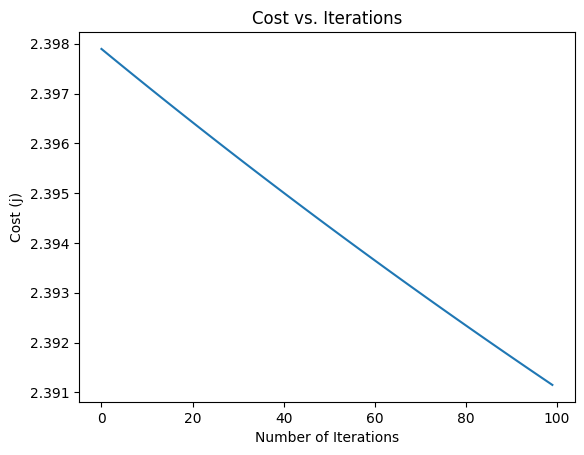

Multi-Class Classification Accuracy: 10.09%


In [71]:
num_classes = Y_trainM.shape[0]
layers_multi = [X_train.shape[0], 5, 4, num_classes]
parameters_multi = neural_network(X_train, Y_trainM, layers_multi, iterations=100, learning_rate=0.1, activation='softmax')

predictions_multi = predict(X_train, parameters_multi, layers_multi, activation='softmax')
